In [1]:
# 导入分析所用python三方库函数
import numpy as np
import pandas as pd 


In [51]:
import os 
data_path = "D:/workspace/机器学习实例/特征工程案例/Data"
train =  pd.read_csv(os.path.join(data_path,"pfm_train.csv"))
test =  pd.read_csv(os.path.join(data_path,"pfm_test.csv"))
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

In [93]:
min(set(train.EmployeeNumber ))
df =  pd.read_csv("DC离职率预测案例分析.csv",encoding="GBK",names=["FieldEN","FieldCN","FieldValues"])
df

,FieldEN,FieldCN,FieldValues
0,Age,年龄,"[10,60]"
1,Attrition,是否离职,"{0,1}"
2,BusinessTravel,出差情况,"{'Non-Travel', 'Travel_Frequently', 'Travel_Ra..."
3,Department,部门,"{'Human Resources', 'Research & Development', ..."
4,DistanceFromHome,通勤距离,"[1,29]"
5,Education,教育程度,"{1,2,3,4,5}"
6,EducationField,教育专业领域,"{'Human Resources','Life Sciences', 'Marketing..."
7,EmployeeNumber,雇员人数,"[1,2065]"
8,EnvironmentSatisfaction,环境满意度,"{1, 2, 3, 4}"
9,Gender,性别,"{0,1}"


In [5]:
# 输出训练集和测试集大小
print('train.shape:',train.shape)
print('test.shape:',test.shape)

train.shape: (1100, 31)
test.shape: (350, 30)


In [303]:
# # train.groupby(by=["Attrition"]).d()
# train["Education"].hist(bins=5)
# # plot.bar(figsize=(12,7),fontsize=12)
# # train.mode("Age")
# # pd.pivot_table(train, index='Gender', columns='Attrition')
# # train["EnvironmentSatisfaction"].describe()
# # matplotlib 中文显示处理
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# # pd.crosstab(train.Gender,train.Attrition, margins=True)
# plt.xlabel('学历')
# plt.ylabel('学历人数')
# plt.title('员工学历分布')
# plt.grid(True)
# plt.xticks(["大专",])
# # plt.show()
# plt.show()
# data = train.groupby(["Education"])['Attrition']
# data.sum
def col_draw(train,col):
    data = train.groupby(col)['Attrition']
#     data = train.groupby(col)["MonthlyIncome"]
    data_sum = data.sum()
    data_mean = data.mean()
    # plt.plot( ["大专","本科","研究生","博士","其他"], data_sum.values,'--')
    # plt.bar(["大专","本科","研究生","博士","其他"], data_sum.values,color='g')
    # for x,y in zip( ["大专","本科","研究生","博士","其他"],data_sum.values):
    #     plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    # plt.ylabel("离职人数")
    # plt.set_loglevel
    #host = plt.subplots()
    fig,left_axis=plt.subplots()
    right_axis = left_axis.twinx()
    p1, = left_axis.plot(data_sum.index,data_sum.values, 'b.-',label="离职人数")
    p2, = right_axis.plot(data_mean.index, data_mean.values, 'r.--',label="离职率")
    left_axis.set_xlabel(col)
    left_axis.set_ylabel('离职人数')
    right_axis.set_ylabel('离职率')
    left_axis.yaxis.label.set_color(p1.get_color())
    right_axis.yaxis.label.set_color(p2.get_color())
    tkw = dict(size=5, width=1.5)
    left_axis.tick_params(axis='y', colors=p1.get_color(), **tkw)
    right_axis.tick_params(axis='y', colors=p2.get_color(), **tkw)
    left_axis.tick_params(axis='x', **tkw)
    plt.grid()

    # for x,y in zip(["大专","本科","研究生","博士","其他"],data_sum.values):
    #     plt.text(x,y+0.05,'%.2f'%y,ha = 'center',va = 'bottom',fontsize=7)
    #     plt.text(x, y+0.05, '%.2f' % y, ha='center', va= 'bottom')
    plt.show()
    print(data.mean())
def attrition_pre(train,col):
    data = train.groupby(col)["Attrition"].mean()
    # plt.figure(figsize=(15,5))
    plt.plot(data.index,data.values, 'r.--',label="薪资")
    plt.ylabel("离职率")
    plt.xlabel(col)
    plt.grid()

    for x,y in zip(data.index,data.values):
        plt.text(x,y+0.005,'%.2f%%' %(y*100),ha='center',va='bottom')
    #     plt.text(x,y+0.005,'%.2f' %(y),ha='center',va='bottom')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


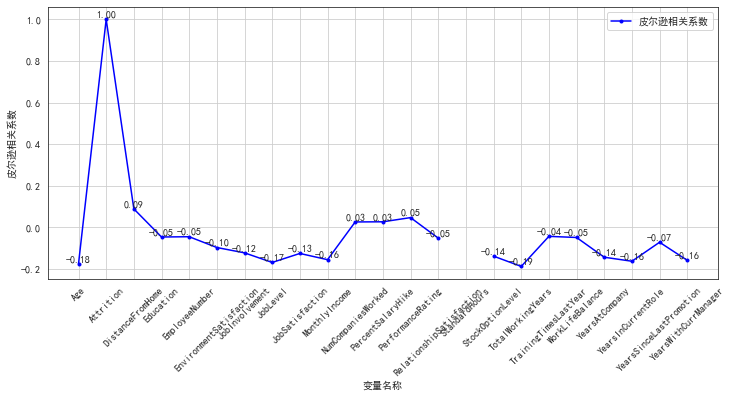

In [331]:
# col_draw(train,"JobSatisfaction")
# attrition_pre(train,"JobSatisfaction")

# col_draw(train,"EnvironmentSatisfaction")
# attrition_pre(train,"EnvironmentSatisfaction")
# data1 = train.groupby("EnvironmentSatisfaction")["Attrition"].mean()
# data2 = train.groupby("JobSatisfaction")["Attrition"].mean()

# # plt.figure(figsize=(15,5))
# plt.plot(data1.index,data1.values, 'r.--',label="EnvironmentSatisfaction")
# plt.plot(data2.index,data2.values, 'b.-',label="JobSatisfaction")
# plt.legend()
# plt.ylabel("离职率")
# plt.xlabel("JobSatisfaction&EnvironmentSatisfaction")
# plt.grid()

# for x,y in zip(data1.index,data1.values):
#     plt.text(x,y+0.005,'%.2f%%' %(y*100),ha='center',va='bottom')
# for x,y in zip(data2.index,data2.values):
#     plt.text(x,y+0.005,'%.2f%%' %(y*100),ha='center',va='bottom')
    
x = train.corr()['Attrition'].index
y = train.corr()['Attrition'].values
plt.figure(figsize=(12,5))
plt.plot(x,y, 'b.-',label="皮尔逊相关系数")
plt.legend()
plt.ylabel("皮尔逊相关系数")
plt.xlabel("变量名称")
plt.xticks(rotation=45)
plt.grid()
for i,j in zip(x,y):
    plt.text(i,j+0.005,'%.2f' %(j),ha='center',va='bottom')

In [209]:
from pyecharts.faker import Faker
from pyecharts import options as opts
from pyecharts.charts import Bar
from pyecharts.commons.utils import JsCode
def bar_base():
    c = (
        Bar()
        .add_xaxis(Faker.choose())
        .add_yaxis("商家A", Faker.values())
        .add_yaxis("商家B", Faker.values())
        .set_global_opts(title_opts=opts.TitleOpts(title="Bar-基本示例", subtitle="我是副标题"))
    )
    c.render("b.html")
    return c
bar_base()

In [164]:
# from pyecharts import Bar,Line,Grid
# from pyecharts import Overlap

# # 通过图表分析哪些因素是主要影响员工离职的因素
# def get_chatrs(train, col):
#     data = train.groupby([col])['Attrition']
#     data_sum = data.sum() # 离职人数
#     data_mean = data.mean()  # 离职率
    
#     bar = Bar(col, title_pos="45%")
#     bar.add('离职人数', data_sum.index, data_sum.values, mark_point = ['max'],
#             yaxis_formatter =  '人', yaxis_max = 200 , legend_pos="40%", legend_orient="vertical", 
#             legend_top="95%", bar_category_gap = '25%')

#     line = Line()
#     line.add('离职率', data_mean.index, data_mean.values, mark_point = ['max'], mark_line = ['average'],
#         yaxis_max = 0.8)

#     overlap = Overlap(width=900, height=400)
#     overlap.add(bar)
#     overlap.add(line, is_add_yaxis=True, yaxis_index=1)

#     return overlap
    

# from pyecharts import Page
# page = Page()
# for col in train.columns[1:]:
#     page.add(get_chatrs(train, col))
# page.render('pages.html')
# page

ImportError: cannot import name 'Bar' from 'pyecharts' (D:\sofeware\Anaconda3\lib\site-packages\pyecharts\__init__.py)

In [10]:
# 特征选择
# 1.1 特征分类
# 定义特征列类型匹配函数
def  obtain_x(train_df,xtype):
    dtype_df  = train_df.dtypes.reset_index()
    dtype_df.columns = ['col','type']
    return dtype_df[dtype_df.type != xtype].col.values
# def obtain_x(train_df,xtype):
#     dtype_df = train_df.dtypes.reset_index()
#     dtype_df.columns = ['col','type']
#     return dtype_df[dtype_df.type!=xtype].col.values

In [11]:
# 调用定义的 obtain_x 函数 提取 非object 特征列名称



In [12]:
# 查看train_local 对应的 数值特征列
train_local[float64_col].iloc[1:3]

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,54,0,1,4,1245,4,3,3,3,10502,...,1,80,1,33,2,1,5,4,1,4
2,34,1,7,3,147,1,1,2,3,6074,...,4,80,0,9,3,3,9,7,0,6


In [13]:
# 对于 本地训练集 train_local 查看其数值特征的统计性描述
train_local.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000
mean,36.945000,0.164000,9.286000,2.91200,1026.16100,2.729000,2.728000,2.066000,2.740000,6532.637000,...,2.685000,80.0,0.785000,11.256000,2.793000,2.7430,6.964000,4.222000,2.209000,4.094000
std,9.031808,0.370461,8.109869,1.02142,597.93442,1.092132,0.707472,1.112151,1.104364,4736.328863,...,1.092231,0.0,0.843497,7.889405,1.276629,0.6996,6.148374,3.663897,3.295479,3.610845
min,18.000000,0.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.0000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.00000,507.25000,2.000000,2.000000,1.000000,2.000000,2935.750000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.0000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.00000,1025.50000,3.000000,3.000000,2.000000,3.000000,4872.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.0000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,14.000000,4.00000,1547.50000,4.000000,3.000000,3.000000,4.000000,8516.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.0000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.00000,2064.00000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.0000,37.000000,18.000000,15.000000,17.000000


D:\sofeware\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
D:\sofeware\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


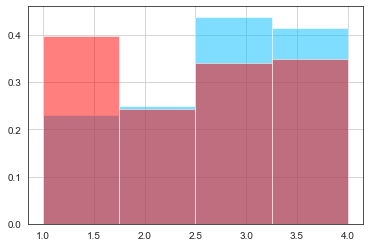

In [48]:
# 根据尝试简单分析
# 绘制两种类型（例子和未离职）的概率占比图
# import matplotlib.pyplot as plt

# plt.hist(x1, num_bins,facecolor='green',width=2 ,alpha=0.5)
# # plt.show()
# plt.hist(x2, num_bins, facecolor='blue',width=2 ,alpha=0.5)
# plt.title('EnvironmentSatisfaction')
# plt.show()
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

x1 = train_local[train_local['Attrition']==0].EnvironmentSatisfaction
x2 = train_local[train_local['Attrition']==1].EnvironmentSatisfaction
num_bins = 4
plt.hist(x1,num_bins,normed=1,color='deepskyblue',alpha=0.5)
plt.hist(x2,num_bins,normed=1,color='red',alpha=0.5)
plt.grid()

D:\sofeware\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.
D:\sofeware\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


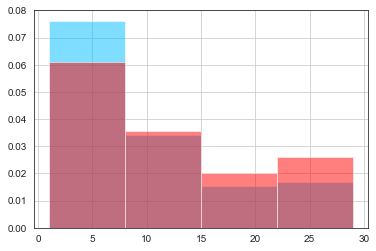

In [49]:
x1 = train_local[train_local['Attrition']==0].DistanceFromHome
x2 = train_local[train_local['Attrition']==1].DistanceFromHome
num_bins = 4
plt.hist(x1,num_bins,normed=1,color='deepskyblue',alpha=0.5)
plt.hist(x2,num_bins,normed=1,color='red',alpha=0.5)
plt.grid()

In [335]:
#  定义特征列类型匹配函数
def obtain_x2(train_df,xtype):
    dtype_df = train_df.dtypes.reset_index()
    dtype_df.columns = ['col','type']
    return dtype_df[dtype_df.type==xtype].col.values

In [336]:
object_col = obtain_x2(train_local,'object')
object_col

array(['BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'], dtype=object)

In [339]:
from sklearn import preprocessing
print('build model...')
# X = np.vstack((train_x,test_x))
# X = preprocessing.scale(X)
x_col = [x for x in float64_col if x not in ['Attrition']]
len(x_col)
X = train[x_col]
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

train_x2 = X[0:1000]
test_x2 = X[1000:]

build model...


In [343]:
le = preprocessing.LabelEncoder()
ohe = preprocessing.OneHotEncoder()  
train2 = pd.DataFrame()
local_all = pd.concat([train_local,test_local],axis=0)

for col in object_col:
    le.fit(local_all[col])
    local_all[col] = le.transform(local_all[col])
    ohe.fit(local_all[col].values.reshape(-1, 1))
    ohecol = ohe.transform(local_all[col].values.reshape(-1, 1)).toarray()
    ohecol = pd.DataFrame(ohecol[:,1:],index=None)#columns=col+le.classes_
    ohecol.columns = ohecol.columns.map(lambda x:str(x)+col)
    train2 = pd.concat([train2, ohecol],axis=1, ignore_index=False)

D:\sofeware\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a L

In [344]:
# 合并 数值型特征 和 非数值型特征类别编码 
trian0 = pd.DataFrame(X,columns=x_col)
# trian0.columns = ohecol.columns.map(lambda x:str(x)+col)
train_all = pd.concat([trian0,train2],axis=1)
train_all
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
train_all_sel = sel.fit_transform(train_all)

In [346]:
train_local4 = train_all.iloc[0:len(train_local)]
test_local4 = train_all.iloc[len(train_local):]
# 定义特征统计函数
def col_Sta(train_df):
    col_sta = pd.DataFrame(columns = ['_columns','_min','_max','_median','_mean','_ptp','_std','_var'])
    for col in train_df.columns:
        col_sta = col_sta.append({'_columns':col,'_min':np.min(train_df[col]),'_max':np.max(train_df[col]),\
            '_median':np.median(train_df[col]),'_mean':np.mean(train_df[col]),\
            '_ptp':np.ptp(train_df[col]),'_std':np.std(train_df[col]),'_var':np.var(train_df[col])},ignore_index=True)
    return col_sta
train_col_sta = col_Sta(train_local4)
test_col_sta = col_Sta(test_local4)
train_col_sta

D:\sofeware\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,_columns,_min,_max,_median,_mean,_ptp,_std,_var
0,Age,0.0,1.000000,0.428571,0.451071,1.000000,0.214935,0.046197
1,DistanceFromHome,0.0,1.000000,0.214286,0.295929,1.000000,0.289493,0.083806
2,Education,0.0,1.000000,0.500000,0.478000,1.000000,0.255227,0.065141
3,EmployeeNumber,0.0,0.999516,0.496366,0.496687,0.999516,0.289552,0.083840
4,EnvironmentSatisfaction,0.0,1.000000,0.666667,0.576333,1.000000,0.363862,0.132395
5,JobInvolvement,0.0,1.000000,0.666667,0.576000,1.000000,0.235706,0.055557
6,JobLevel,0.0,1.000000,0.250000,0.266500,1.000000,0.277899,0.077228
7,JobSatisfaction,0.0,1.000000,0.666667,0.580000,1.000000,0.367937,0.135378
8,MonthlyIncome,0.0,1.000000,0.203449,0.290871,1.000000,0.249287,0.062144
9,NumCompaniesWorked,0.0,1.000000,0.222222,0.299000,1.000000,0.280201,0.078513


In [348]:
varzero_col = train_col_sta[train_col_sta['_var']==0]._columns
varzero_col.values
# array(['StandardHours'], dtype=object)
feature_end = [x for x in train_local4.columns if x not in varzero_col.values]

In [354]:
y_col = 'Attrition'
# train_x = train_local[x_col]
train_y = train_local[y_col]
from sklearn.feature_selection import chi2#调用卡方信息量
chi2_col,pval_col = chi2(train_local4[feature_end].values,train_y)

(array([3.03048021e+00, 2.04575778e+00, 1.50637930e-01, 6.16867360e-01,
        2.31283076e+00, 1.47625169e+00, 9.07155500e+00, 3.83070446e+00,
        5.55444676e+00, 7.40055306e-02, 1.88065525e-01, 1.56263669e+00,
        2.56767690e-01, 5.65754476e+00, 4.91794621e+00, 7.41449913e-02,
        2.67643191e-01, 2.93670316e+00, 4.87638281e+00, 1.87430568e+00,
        5.04533145e+00, 4.78652734e+00, 1.56550829e-02, 2.05164105e+00,
        3.22561441e+00, 3.87153727e-01, 2.24550002e+00, 1.23015857e+00,
        1.67050919e+00, 4.27701084e+00, 1.29774057e-01, 3.02545721e+00,
        3.82568104e+00, 5.01912299e+00, 5.65198297e+00, 5.79215320e+00,
        1.19953640e+00, 3.24165921e-04, 2.48614524e+01, 4.50584215e+00,
        2.10761130e+01, 5.77384009e+01]),
 ['Age',
  'DistanceFromHome',
  'Education',
  'EmployeeNumber',
  'EnvironmentSatisfaction',
  'JobInvolvement',
  'JobLevel',
  'JobSatisfaction',
  'MonthlyIncome',
  'NumCompaniesWorked',
  'PercentSalaryHike',
  'PerformanceRating',

In [355]:
from sklearn.feature_selection import mutual_info_classif#调用互信息
mic_col = mutual_info_classif(train_local4[feature_end].values,train_y)

In [356]:
# 42
from sklearn.feature_selection import f_classif#调用f信息量
f_col,pval_col = f_classif(train_local4[feature_end].values,train_y)

In [357]:
feature_all = feature_end

feature_sel = pd.DataFrame()


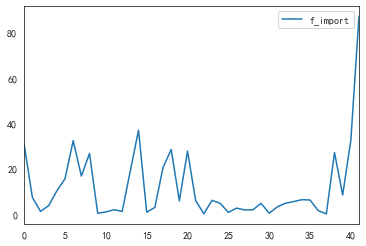

In [361]:
feature_sel.plot(y=['f_import'])
plt

In [368]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
train_x_0 = train_local[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','YearsSinceLastPromotion']]#RelationshipSatisfaction
train_y_0 = train_local[y_col]
clf = LogisticRegression(C=10)
clf.fit(train_x_0, train_y_0)
scores = cross_val_score(clf, train_x_0, train_y_0)
print(scores.mean())
# print(clf.coef_)
# y_pred = clf.predict(test_local[['EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','YearsSinceLastPromotion']])
x_col = [x for x in float64_col if x not in ['Attrition']]
len(x_col)
y_col = 'Attrition'
train_x = train_local[x_col]
train_y = train_local[y_col]
clf = LogisticRegression(C=10)
clf.fit(train_x, train_y)
scores = cross_val_score(clf, train_x, train_y)
print(scores.mean())
# 


0.8370006974003799
0.8469807373205397


D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

D:\sofeware\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


0.8470288338984681


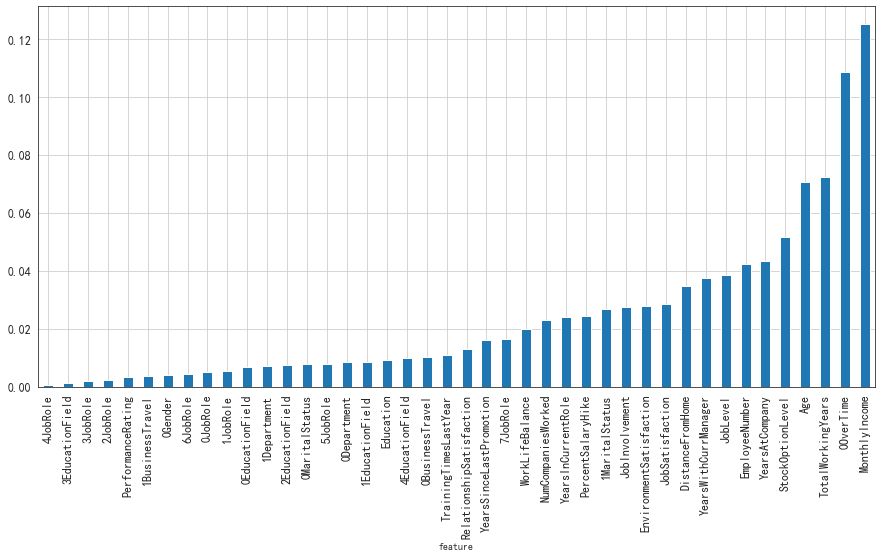

In [449]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=2, random_state=0)
clf = clf.fit(train_local4[feature_end], train_y)
scores = cross_val_score(clf, train_local4[feature_end], train_y)
print(scores.mean())
feature_sel['feature'] = feature_all
feature_sel["importance"] = clf.feature_importances_
feature_sel.sort_values(by=["importance"],ascending=True,inplace=True)
feature_sel.set_index('feature',inplace=True)
feature_sel["importance"].plot(kind="bar",figsize=(15,7),fontsize=12)
# plt.xticks(rotation=45)
plt.grid()
plt.show()

In [371]:
len(clf.feature_importances_)

42

In [438]:
train_local4 = train_all.iloc[0:len(train_local)]
test_local4 = train_all.iloc[len(train_local):]

train_x3 = train_local4
test_x3 = test_local4


feature_a = feature_sel[(feature_sel['importance']>=1) | (feature_sel['chi2_import']>=1) | (feature_sel['mic_import']>=0.001)].feature.values
clf = LogisticRegression(C=10)
clf.fit(train_x3[feature_a], train_y)
scores = cross_val_score(clf, train_x3[feature_a], train_y)
print(scores.mean())

AttributeError: 'DataFrame' object has no attribute 'feature'

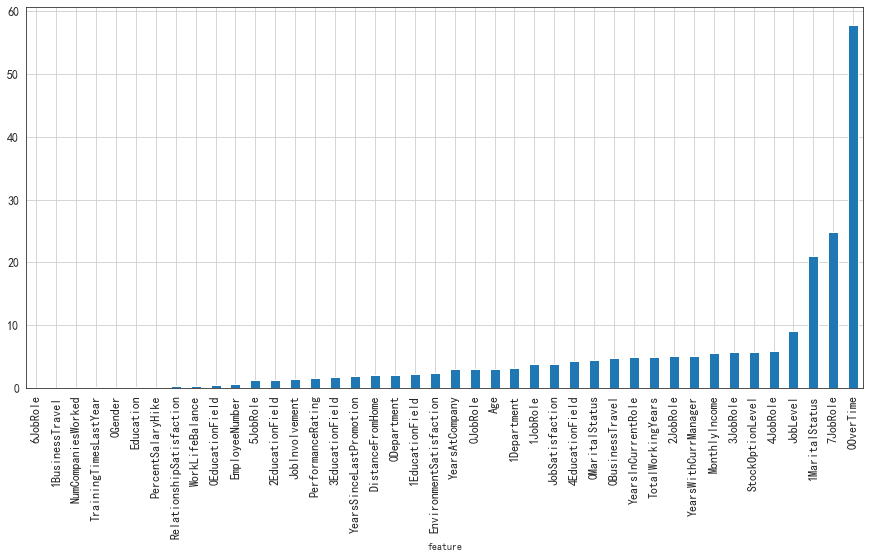

In [446]:
#feature_RF = pd.DataFrame(feature_RF)
feature_sel['feature'] = feature_all
feature_sel['chi2_import'] = chi2_col
feature_sel['f_import'] = f_col
feature_sel['mic_import'] = mic_col
# feature_sel['feature'] = feature_all
# feature_sel["importance"] = clf.feature_importances_
feature_sel.sort_values(by=["chi2_import"],ascending=True,inplace=True)
feature_sel.set_index('feature',inplace=True)
feature_sel["chi2_import"].plot(kind="bar",figsize=(15,7),fontsize=12)
plt.grid()
# plt.xticks(rotation=45)
plt.show()

In [460]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=2, random_state=0)
# clf = clf.fit(train_local4[feature_end], train_y)
# scores = cross_val_score(clf, train_local4[feature_end], train_y)
# print(scores.mean())
# feature_sel['feature'] = feature_all
# feature_sel['importance']= clf.feature_importances_
# # clf = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=2, random_state=0)
# # # clf = clf.fit(train_local4[feature_end], train_y)
feature_a = feature_sel[(feature_sel['importance']>=0.005)].feature.values
clf = LogisticRegression(C=10)
clf.fit(train_x3[feature_a], train_y)
scores = cross_val_score(clf, train_x3[feature_a], train_y)
print(scores.mean())

0.8729528894019191


D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
D:\sofeware\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.2

In [466]:
Pre = clf.predict(test_x3[feature_a])
PrePro = clf.predict_proba(test_x3[feature_a])
test_y = test_local[y_col]
out_csv3 = pd.DataFrame()
out_csv3['True'] = test_local[y_col].values
out_csv3.shape
out_csv3['Pre'] = Pre
out_csv3['PrePro1'] = PrePro[:,0]
out_csv3['PrePro2'] = PrePro[:,1]

P_all = sum(test_y)
N_all = len(test_y)-P_all

OutTP = map(lambda x,y : 1 if ((x==1) and (y==1)) else 0,Pre,test_y)
OutFP = map(lambda x,y : 1 if ((x==1) and (y==0)) else 0,Pre,test_y)
OutTN = map(lambda x,y : 1 if ((x==0) and (y==0)) else 0,Pre,test_y)
OutFN = map(lambda x,y : 1 if ((x==0) and (y==1)) else 0,Pre,test_y)

TP = sum(OutTP)
FP = sum(OutFP)
TN = sum(OutTN)
FN = sum(OutFN)
P = TP/(TP+FP)
R = TP/P_all

OutNum = map(lambda x,y : 1 if (x==y) else 0,Pre,test_y)
TNum = sum(OutNum)
acc = TNum/len(test_y)

print('TP(真实为1):',TP)
print('FP(真实为0):',FP)
print('TN(真实为0):',TN)
print('FN(真实为1):',FN)
print('P:',P)
print('R:',R)

print('ACC:',acc)

TP(真实为1): 7
FP(真实为0): 3
TN(真实为0): 83
FN(真实为1): 7
P: 0.7
R: 0.5
ACC: 0.9


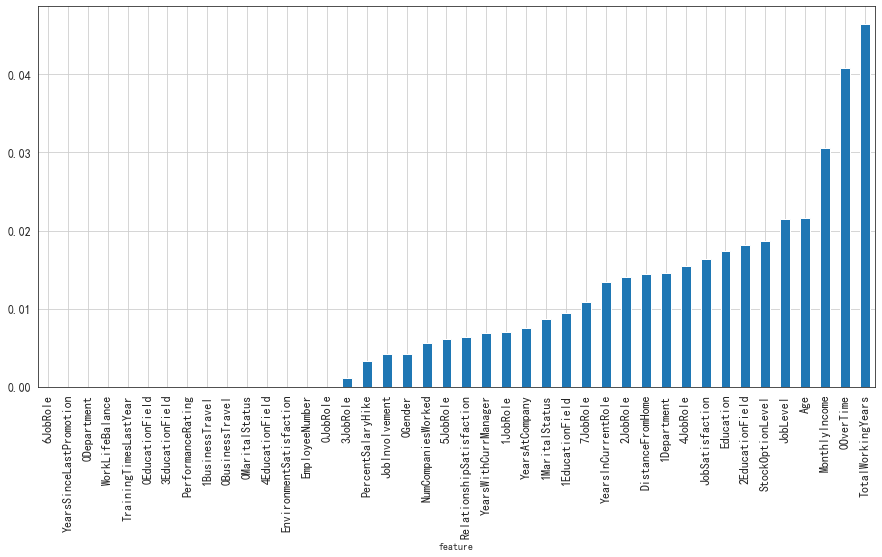

In [443]:
#feature_RF = pd.DataFrame(feature_RF)
feature_sel['feature'] = feature_all
feature_sel['chi2_import'] = chi2_col
feature_sel['f_import'] = f_col
feature_sel['mic_import'] = mic_col
# feature_sel['feature'] = feature_all
# feature_sel["importance"] = clf.feature_importances_
feature_sel.sort_values(by=["mic_import"],ascending=True,inplace=True)
feature_sel.set_index('feature',inplace=True)
feature_sel["mic_import"].plot(kind="bar",figsize=(15,7),fontsize=12)
plt.grid()
# plt.xticks(rotation=45)
plt.show()